# Data Visualization of the Ford GoBike Dataset
## by Naqeeb Tahasildar

## Preliminary Wrangling

The Ford GoBike dataset contains the data of each individual who used the service in the greater San Francisco Bay area. The dataset contains data only for the month of February in 2019.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
df = pd.read_csv('/Users/naqeebtahasildar/Desktop/201902-fordgobike-tripdata.csv')

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Extract the day value from 'start_time', 'end_time' columns

df['start_day'] = (pd.to_datetime(df.start_time)).dt.strftime("%A")
df['end_day'] = (pd.to_datetime(df.end_time)).dt.strftime("%A")

In [8]:
# Convert 'user_type', 'member_gender' columns into categorical datatype

df['user_type'] = df.user_type.astype('category')
df['member_gender'] = df.member_gender.astype('category')

In [9]:
# convert birth year from float to integer

df['member_birth_year'] = df.member_birth_year.astype('Int32')

In [10]:
# extract time of the day from the start_

df['time'] = (pd.to_datetime(df.start_time)).dt.strftime("%H")

In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,time
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thursday,Friday,17
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,<NA>,NaN,No,Thursday,Friday,18
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thursday,Friday,12
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Thursday,Friday,17
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thursday,Friday,23


### What is the structure of your dataset?

> The dataset contains 16 columns with different variables such as trip duration, start station, end station etc. The data contains 183412 observations. The 'user_type' and 'member_gender' contain qualitative nominal datatype. Two new columns are created in the original dataframe which mention the start_day and end_day.

### What is/are the main feature(s) of interest in your dataset?

> The most interesting feature of the dataset is to observe the relationship between trip duration and other variables.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> It would be interesting to see what is the typical trip duration, how many people use the service on a given day, what is the gender of the people, do subscribers/customers use our service more?

## Univariate Exploration

First I want to take a look at the distribution of the variable 'duration_sec'?

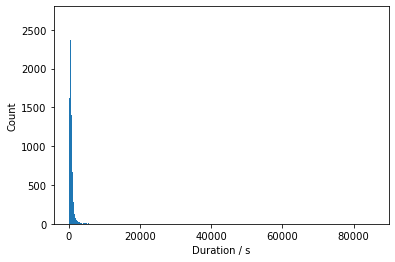

In [12]:
bins = np.arange(0, df.duration_sec.max()+100, 10)
plt.hist(data = df, x='duration_sec', bins = bins)
plt.xlabel('Duration / s')
plt.ylabel('Count');

The plot shows that most points are concentrated below the 10k mark. Hence, the x-axis is transformed into log scale to see the data in detail.

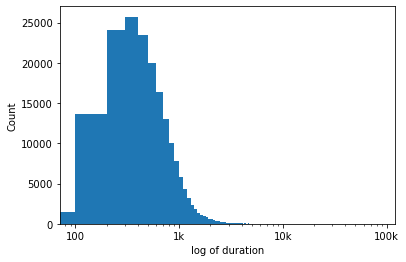

In [13]:
# The variable trip duration has most of the datapoints below the 10k mark hence, I want to ..
# transform the x-axis into log scale

bins = np.arange(0, df.duration_sec.max()+100, 100)
plt.hist(data = df, x='duration_sec', bins = bins)
plt.xscale('log')
ticks = [1e2,1e3,1e4,1e5]
labels = [100,'1k','10k','100k']
plt.xticks(ticks,labels);
plt.xlabel('log of duration')
plt.ylabel('Count');

In [14]:
# amount of datapoints above 10000s

print('Percentage of datapoints above 10k mark=', (sum(df.duration_sec>10000)/df.duration_sec.count())*100)

Percentage of datapoints above 10k mark= 0.2513466948727455


The log of duration shows a right-skewed distribution with peak at between 300-400 mark. Also, only 0.25% of data is above 10000s mark.

Next, I would like to calculate the distance travelled by the users using the Haversine formula

In [15]:
# formula to calculate the distance travelled using the Haversine formula
# source: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

def haversine_formula(lon1, lat1, lon2, lat2):
 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [16]:
# calculate the distance and store it distance column.

df['distance'] = haversine_formula(df['start_station_longitude'],df['start_station_latitude'],df['end_station_longitude'],df['end_station_latitude'])

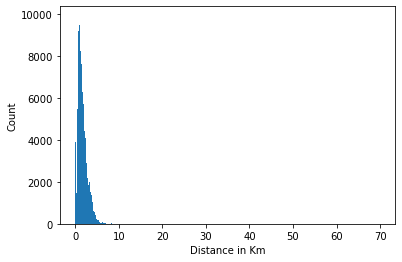

In [17]:
bins = np.arange(0,df.distance.max()+.5, 0.1)
plt.hist(data=df, x='distance', bins = bins)
plt.xlabel('Distance in Km')
plt.ylabel('Count');

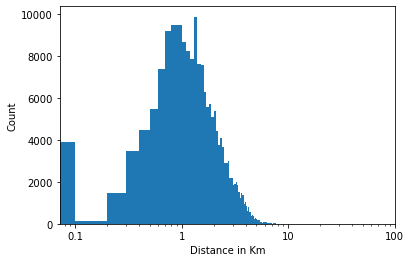

In [18]:
bins = np.arange(0,df.distance.max()+.5, 0.1)
plt.hist(data=df, x='distance', bins = bins)
plt.xscale('log')
plt.xticks([0.1,1,10,100],['0.1','1','10','100'])
plt.xlabel('Distance in Km')
plt.ylabel('Count');

The plot shows that distance has a symmetric and bimodal distribution with most trips under 10 km and a peak value at around 1km.

Next, Let's take a look at which type of user use the service most?

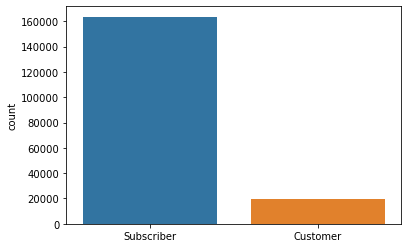

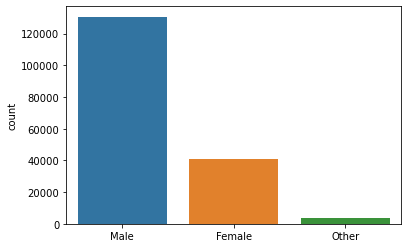

In [19]:
f0 = plt.figure()

seq = df.user_type.value_counts().index
sb.countplot(data = df, x='user_type', order=seq)
plt.xlabel('');

f1 = plt.figure()

seq = df.member_gender.value_counts().index
sb.countplot(data = df, x='member_gender', order = seq)
plt.xlabel('');

Clearly subscribers use the service far more than the customers. It would be interesting to see in the bivariate exploration if subscribers also take longer trips than customers. From the second graph we see that 'Male' group uses the bike service far more than 'Female' and 'Other'.

Next, we take a look at which is the busiest time and day of the week

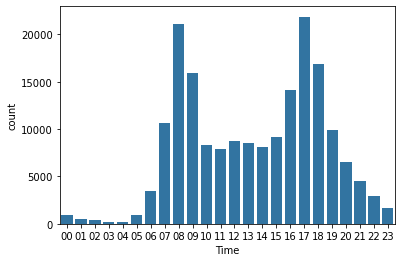

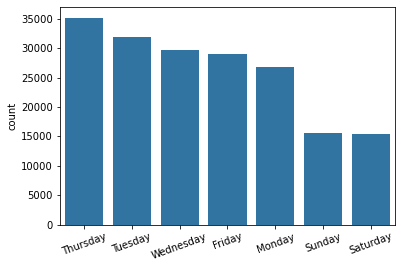

In [20]:
f0 = plt.figure()
base_color = sb.color_palette()[0]
sb.countplot(data = df, x='time', color=base_color)
plt.xlabel('Time');

f1 = plt.figure()

sb.countplot(data = df, x = 'start_day', color = base_color, order =df.start_day.value_counts().index)
plt.xlabel('')
plt.xticks(rotation=20);

It is clear from the graph that between 7-9 and 16-18 the service is used the most. Also, between 10-15 the number of users are almost constant. On Thursday most number of people use the service and it turns out that more people use the service on weekdays than on weekends.

Finally, I want to at look which age group use the service the most?

In [21]:
# calculate the age of each individual

df['age'] = (2019 - df.member_birth_year)

In [22]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,1.689598,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,1.096900,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,0.910383,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,1.429839,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,2.224289,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,69.425625,141.000000


The maximum age of the user is 141 which is unrealistic(as the oldest person to live is 122 years). So it seems like the birth year has erroneous data. Also, I would not expect anybody above 90's years to use the service. Hence, for further analysis users with age <= 90.

In [23]:
# consider the indivduals with age equal to or below 90, as above this very few datapoints are present in the dataset

df_sub = df[df.age<=90]

In [24]:
bin_edges = [10,20,30,40,50,60,70,80,90]

In [25]:
bin_names = ['20s','30s','40s','50s','60s','70s','80s','90s']

In [26]:
df_sub['age_group'] = pd.cut(df_sub['age'], bin_edges, labels=bin_names)

<ipython-input-26-e19bb3e59760>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['age_group'] = pd.cut(df_sub['age'], bin_edges, labels=bin_names)


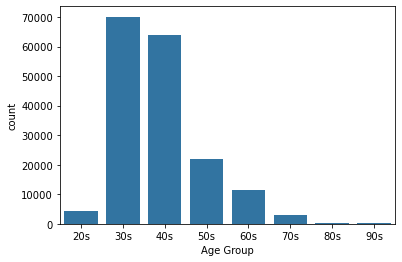

In [27]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_sub, x='age_group', color=base_color)
plt.xlabel('Age Group');

The plot shows that most users are in their 30's and 40's infact about 70% of the datapoints fall under these two groups.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The variable duration_sec has most datapoints below 10k mark hence, to observe the details the x-axis had to be transformed into a log scale. After plotting we can see that the distribution is right-skewed and only 0.25% of the total data is above 10k mark. Similar transformation was performed on the distance variable and plotting the distribution was symmetric and bimodal. Additionally, I also saw that people use the service most between 7-9 and 16-18 and majority of the users are in the their 30's and 40's. I also noticed that most people who use the service are male subscribers and that the service is used more on weekdays than on weekends.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the orignal dataframe the variables 'start_time' and 'end_time' where used to extract day and time value. This will be useful later when we want to observe the trends for differnt days and time of the week. Also, the 'user_type' and 'member_gender' variables are converted to categorical datatype. The birth year had a float value which was converted to an integer. Additionally, I had to determine the age of the users and then put them in uniform bins to get age group to see which age group uses the service the most. I also used the latitude and longitude values to determine the distance travelled by each user.


## Bivariate Exploration

Next, I want to take a look at the bivariate exploration comparing two variables at a time. 

In [28]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,distance,age
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437,1.689598,34.193563
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689,1.096900,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,18.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000,0.910383,27.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000,1.429839,32.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000,2.224289,39.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,69.425625,141.000000


Which type of users use the service for a longer time ?

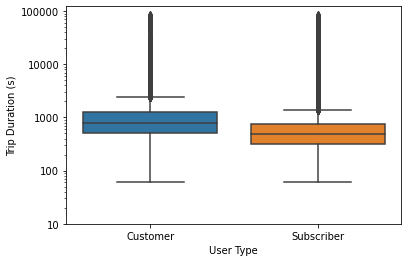

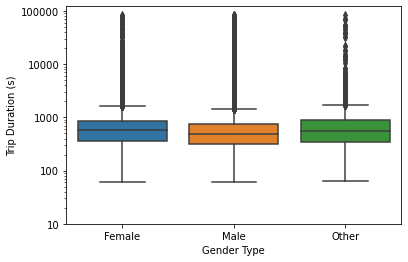

In [40]:
f0 = plt.figure()

sb.boxplot(data=df, x='user_type', y='duration_sec')
plt.yscale('log')
ticks = [10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xlabel('User Type')
plt.ylabel('Trip Duration (s)');

f1 = plt.figure()
sb.boxplot(data=df, x='member_gender', y='duration_sec')
plt.yscale('log')
ticks = [10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (s)');

Subscribers tend to use the service for short trips whereas on average customers take longer trips. Additionally, trip durations are similar for different genders.

Is the trip duration similar for different time of the day?

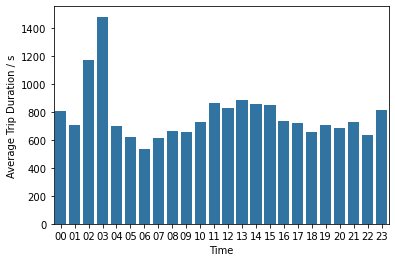

In [30]:

base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'time', y = 'duration_sec', color=base_color, ci=None)
plt.xlabel('Time')
plt.ylabel('Average Trip Duration / s');

It seems that average trip duration is similar in a given day except that late nights users take longer trips.

Next, I want to investigate if people use the service for longer time on weekdays or weekends?

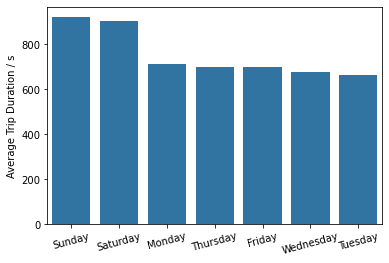

In [31]:
orders = ((df.groupby('start_day')['duration_sec'].mean()).sort_values(ascending=False)).index
base_color = sb.color_palette()[0]
sb.barplot(data = df, x = 'start_day', y = 'duration_sec', color=base_color, ci=None, order = orders)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('Average Trip Duration / s');

Even though less number of people used the service on weekends it turns out that on average they take longer trips.

what is the average trip duration for different age groups?

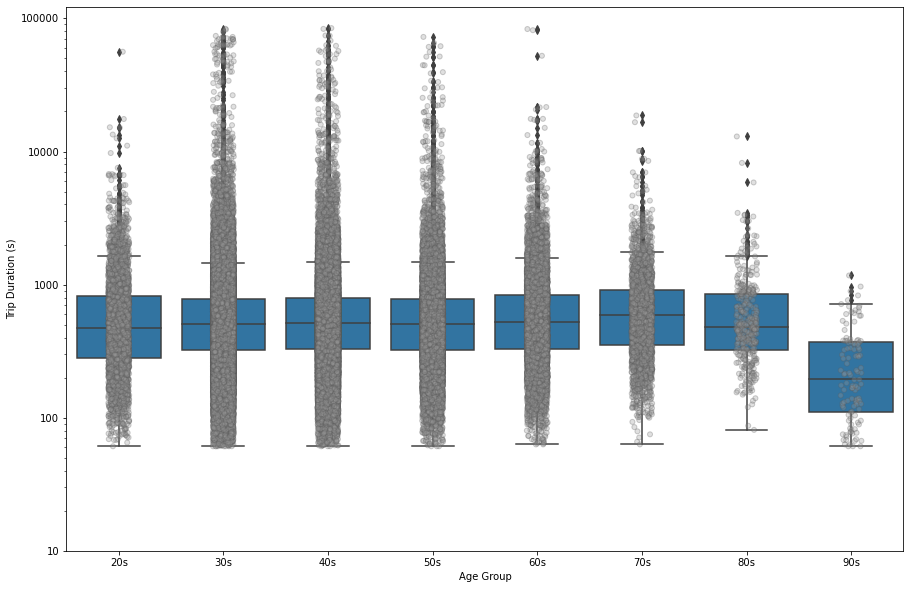

In [32]:
plt.figure(figsize=(15,10))
orders = ((df.groupby('start_day')['duration_sec'].mean()).sort_values(ascending = False)).index
base_color = sb.color_palette()[0]
sb.boxplot(data = df_sub, x = 'age_group', y = 'duration_sec', color = base_color)
sb.stripplot(data = df_sub, x = 'age_group', y = 'duration_sec', alpha = 0.3, linewidth=1,color = '0.6')
plt.yscale('log')
ticks = [10, 100, 1000, 10000, 100000]
labels = ['{}'.format(v) for v in ticks]
plt.yticks(ticks, labels)
plt.xlabel('Age Group')
plt.ylabel('Trip Duration (s)');

It seems that for all age groups the average trip duration is similar except for the 90's group which is far shorter. I also plotted the number of data points for each age group and we see that for that 80's and 90's age group have very less datapoints

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the first few graphs I learned that subscribers use the service far more than customers. However, on average customers take longer trips than subscribers. I also saw that on average trip duration was similar for different genders. Also, the average trip duration for different age groups was similar except for 90's group which was far less. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that number of users who are in their 80's and 90's are very less. The other observation was that even though alot of people used the service on weekdays compared to weekends. The average trip duration was longer on weekends. Additionally, people use the service for longer trips between 2-3 in the morning.

## Multivariate Exploration

In this section we will analyze some complex relationships between more than two variables

First, I would like to see the relationship between trip duration and day of the week for different user types

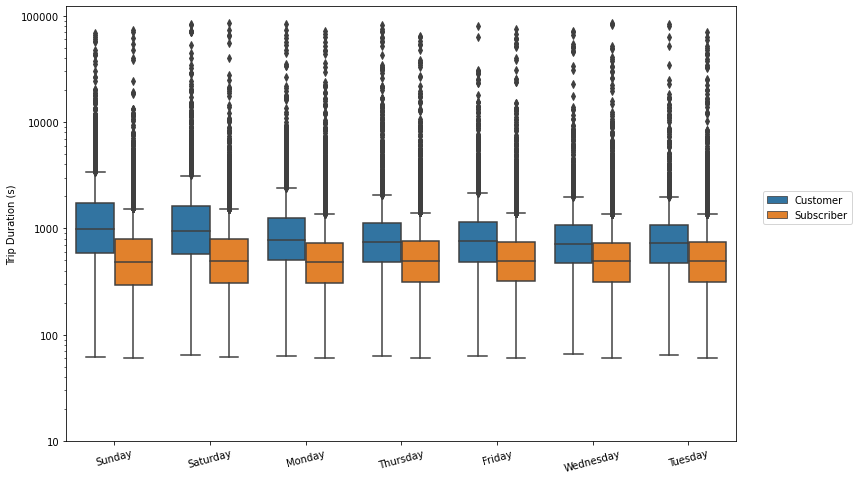

In [33]:
# plot from bivariate exploration

plt.subplots(figsize=(12, 8))
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', hue='user_type', order = orders)
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('Trip Duration (s)')
plt.yscale('log')
plt.legend(loc=(1.04,0.5))
plt.yticks(ticks, labels);

From the bivariate exploration it was clear that customers on average take longer trips. From the above plot we see that this is consistenly true across all the days of the week. Also, througout the week the average trip duration for subscribers remains similar however, for customers they seem to take longer trips on weekends than on weekdays.

I want continue the exploration further and analyze the relationship of trip duration by gender and day of the week

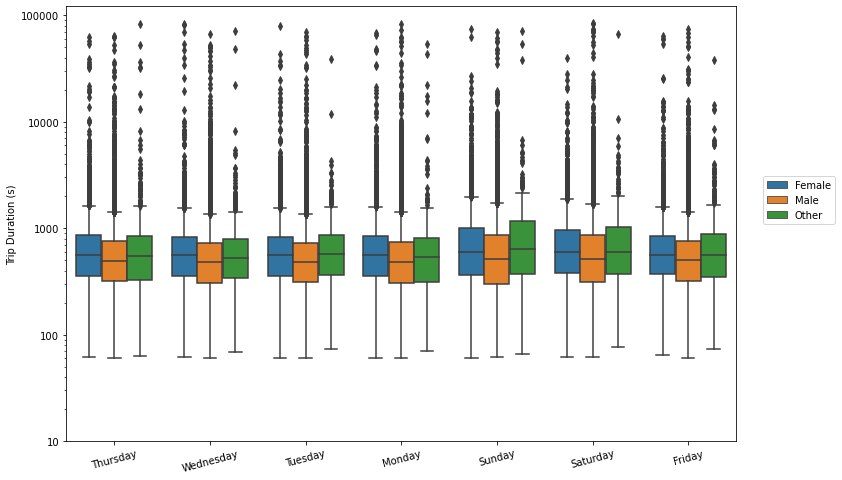

In [34]:
# plot from bivariate exploration


plt.subplots(figsize=(12, 8))
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'start_day', y = 'duration_sec', hue='member_gender')
plt.xticks(rotation=15)
plt.xlabel('')
plt.ylabel('Trip Duration (s)')
plt.legend(loc=(1.04,0.5))
plt.yscale('log')
plt.yticks(ticks, labels);

In the bivariante exploration we saw that trip duration for different genders is similar with the other gender having taking slightly longer trips. When I did the analysis for different days of the week we found a similar pattern.

I continued my multivariate analysis and plotted the relationship between trip duration, day, user type and different time of the day. To observe the results easily, I grouped the different time of the day into categories such as morning, afternoon etc.

In [35]:
# Convert the time variable into integer datatype

df.time = df.time.astype(int)

In [36]:
bin_1 = [0,3,7,11,15,19,23]

In [37]:
name_1 = ['Late Night', 'Early Morning', 'Morning', 'Afternoon','Evening', 'Night']

In [38]:
df['time_group'] = pd.cut(df['time'], bin_1, labels=name_1, include_lowest=True)

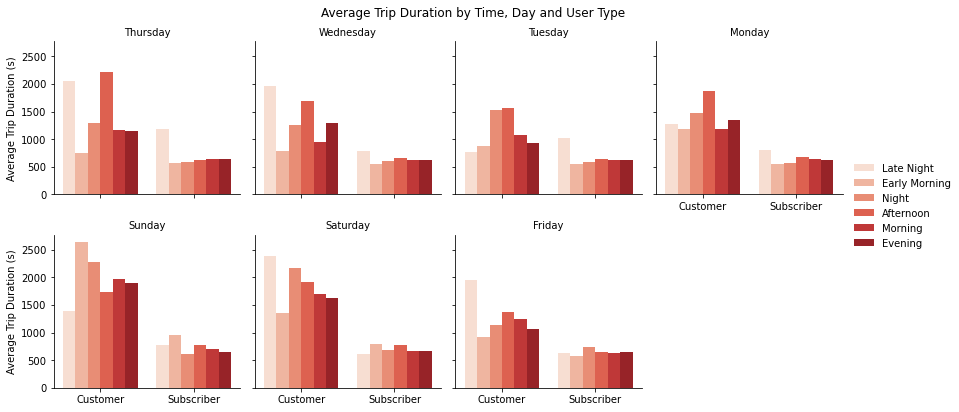

In [39]:
g = sb.FacetGrid(data = df, col = 'start_day', col_wrap=4)
g.map(sb.barplot, 'user_type', 'duration_sec', 'time_group', ci=None, 
      hue_order = df.time_group.value_counts().sort_values().index,
      order = ['Customer', 'Subscriber'],
      palette = 'Reds')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Average Trip Duration by Time, Day and User Type')
g.set_xlabels('')
g.set_ylabels('Average Trip Duration (s)')
g.set_titles('{col_name}')
g.add_legend();

In previous plots we saw that for different days of the week the customers were taking longer trips. It seems we have a similar trend for different time of the day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In multivariate exploration I noticed that on average customers take longer trips compared to subscribers throughout the week. Furthermore we saw a similar pattern for different time of the day. All genders typically use the service for the same duration throughout the week.

### Were there any interesting or surprising interactions between features?

> Trip duration by subscribers were similar throughout the week. However, customers tend to take longer trips on weekends compared to weekdays.